In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

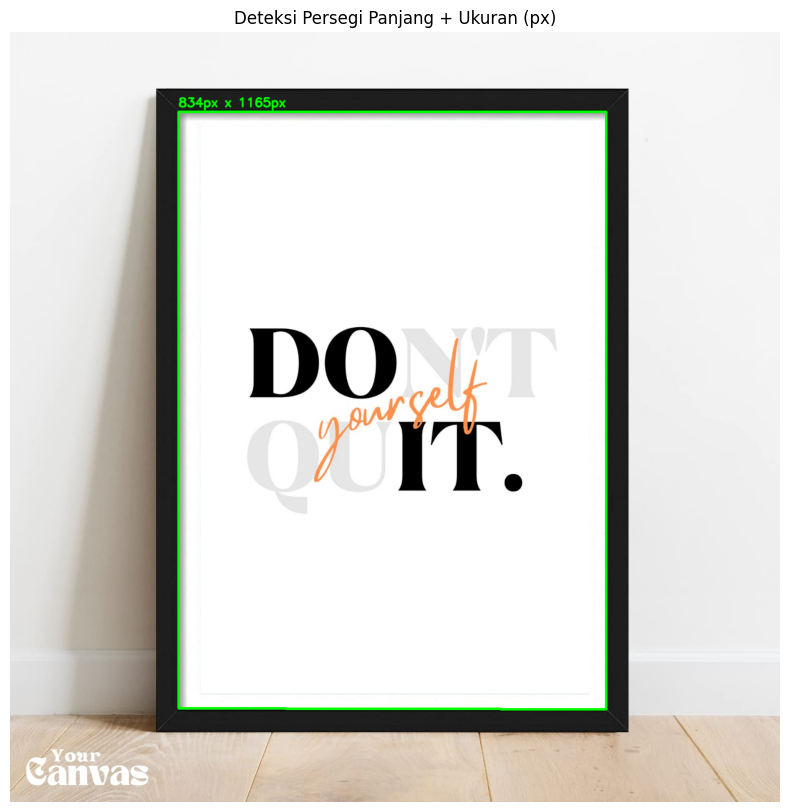

In [2]:
img_path = '/kaggle/input/gambar/poster.jpg'

img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

edges = cv2.Canny(blurred, 50, 150)

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    epsilon = 0.02 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)

    if len(approx) == 4 and cv2.contourArea(cnt) > 10000:
        # Gambar garis kontur
        cv2.drawContours(img, [approx], 0, (0, 255, 0), 4)

        x, y, w, h = cv2.boundingRect(approx)
        
        label = f"{w}px x {h}px"
        cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.8, (0, 255, 0), 2, cv2.LINE_AA)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title("Deteksi Persegi Panjang + Ukuran (px)")
plt.axis("off")
plt.show()